In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
df = df[['Close']].copy() 
df.tail()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

C:\Users\anany\AppData\Local\Temp\ipykernel_8000\632547786.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [2]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 60)

X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

28/28 [==============================] - 3s 33ms/step - loss: 0.0264 - val_loss: 0.0333
Epoch 2/50
28/28 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0096
Epoch 3/50
28/28 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 4/50
28/28 [==============================] - 1s 22ms/step - loss: 6.8121e-04 - val_loss: 9.2790e-04
Epoch 5/50
28/28 [==============================] - 1s 24ms/step - loss: 5.3322e-04 - val_loss: 6.6847e-04
Epoch 6/50
28/28 [==============================] - 1s 24ms/step - loss: 5.2519e-04 - val_loss: 7.4039e-04
Epoch 7/50
28/28 [==============================] - 1s 22ms/step - loss: 5.4622e-04 - val_loss: 6.6191e-04
Epoch 8/50
28/28 [==============================] - 1s 21ms/step - loss: 5.1924e-04 - val_loss: 6.7559e-04
Epoch 9/50
28/28 [==============================] - 1s 43ms/step - loss: 5.0326e-04 - val_loss: 6.4846e-04
Epoch 10/50
28/28 [==============================] - 2s 6

In [4]:
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

9/9 [==============================] - 1s 16ms/step


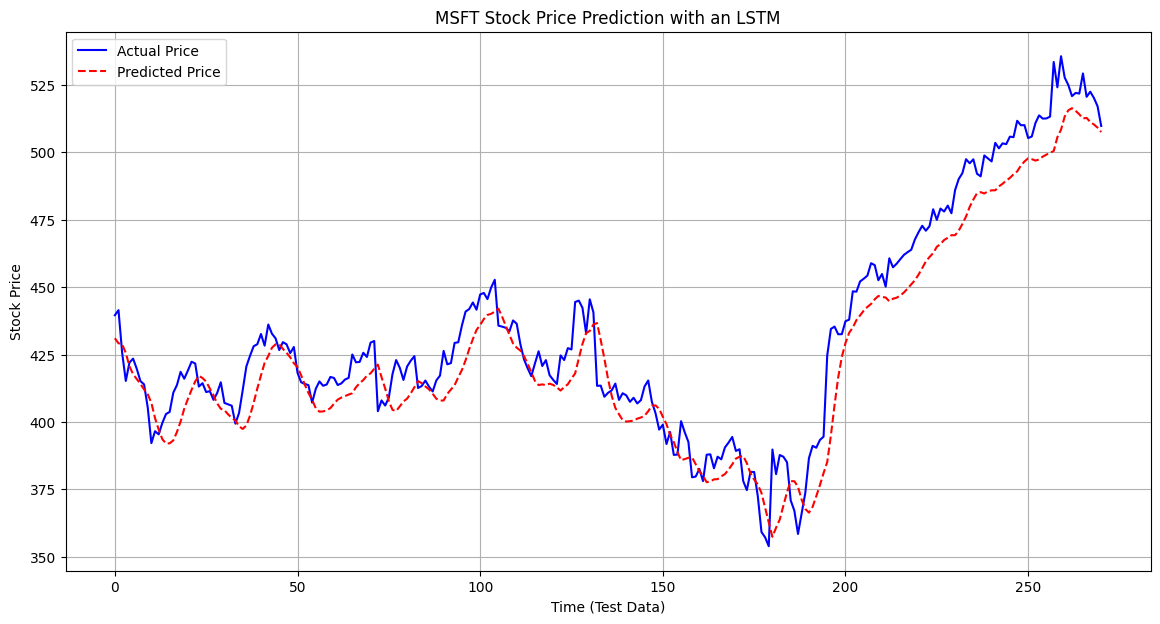

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red', linestyle='--')
plt.title('MSFT Stock Price Prediction with an LSTM')
plt.xlabel('Time (Test Data)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#still needs a lookback window
#much smoother predictions - forget gate helps filter noise and be more generalised
#focus more on long-term trends than specific spikes
#GRU - similar performance with higher efficiency, fewer gates and params